# K-Means Clustering on a Unique Dataset

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

## Data Loading

In [2]:
def load_and_preprocess_dataset(filename):

  data = pd.read_csv(filename)
    
  scaler = StandardScaler()
  df = scaler.fit_transform(data)
  return df if df is not None else data

In [3]:
datasets = {}
for i in range(1, 6):
  filename = f"dataset/synthetic_dataset_{i}_no_cluster.csv"
  try:
    data = load_and_preprocess_dataset(filename)
    datasets[f"dataset_{i}"] = data
  except FileNotFoundError:
    print(f"Error: File '{filename}' not found. Skipping.")

In [4]:
for name,data in datasets.items():
    print(data)
    print()

[[ 1.68165692  0.15357536]
 [-0.74263648  1.28465445]
 [-1.10997734 -1.41149111]
 [-1.40916191 -1.48958999]
 [-1.23023105 -1.14409592]
 [-0.9517124  -1.18071566]
 [-0.23684399  1.20500254]
 [-1.20557544 -1.23862599]
 [ 1.23774029  0.49742703]
 [-0.93804993 -1.17776771]
 [ 1.09974275  0.07193302]
 [ 1.34028235  0.28113194]
 [ 1.51856137  0.24235252]
 [ 1.19175177  0.09357736]
 [ 0.87090899  0.10958568]
 [-1.28016266 -1.35989455]
 [-0.21176656  1.31245702]
 [-1.27875103 -1.23684465]
 [ 1.43588227 -0.16581729]
 [-0.77694817 -1.46362156]
 [ 1.73507901  0.23908645]
 [ 1.19392261 -0.01896185]
 [-1.04018083 -1.40077247]
 [-0.18269105  0.94075465]
 [-0.96532738 -1.32163961]
 [-0.33781166  1.25247466]
 [-0.43659366  1.21635294]
 [-1.13905286 -1.18409137]
 [-0.15324108  0.85887296]
 [ 1.03514403 -0.12108052]
 [ 0.97629651  0.00692192]
 [ 1.7751906  -0.20478172]
 [-1.46439025 -1.06690615]
 [-1.27943382 -1.32334164]
 [-0.12145808  1.39427468]
 [-0.17599757  1.08177588]
 [-1.02138323 -1.36043696]
 

In [5]:
for name,data in datasets.items():
    print(data[:,0])
    print()

[ 1.68165692 -0.74263648 -1.10997734 -1.40916191 -1.23023105 -0.9517124
 -0.23684399 -1.20557544  1.23774029 -0.93804993  1.09974275  1.34028235
  1.51856137  1.19175177  0.87090899 -1.28016266 -0.21176656 -1.27875103
  1.43588227 -0.77694817  1.73507901  1.19392261 -1.04018083 -0.18269105
 -0.96532738 -0.33781166 -0.43659366 -1.13905286 -0.15324108  1.03514403
  0.97629651  1.7751906  -1.46439025 -1.27943382 -0.12145808 -0.17599757
 -1.02138323 -0.07447882 -1.05638196 -0.17764172  1.04278167 -0.36522716
 -1.31194183  1.63303117 -1.27791762  1.42325657  1.10753911 -1.09288088
  1.00582257 -0.0060201  -0.65113764 -0.31019454 -0.8616663  -0.03193503
 -0.50484055 -0.32213908 -0.66296668  1.2402592  -0.34304821  1.04465551
 -0.90938628 -0.3883417  -0.91997644 -1.11138789 -0.92566059 -1.06594755
 -0.41811341 -0.0253687  -0.90424041 -0.04288804 -0.12923269 -1.06073148
 -0.38596626  1.15499064  0.0955375   1.40020424  1.06974548 -0.29458594
  1.40020683 -0.29660709 -0.19957427  1.33749724  0.

In [6]:
for name,data in datasets.items():
    print(data[:,1])
    print()

[ 0.15357536  1.28465445 -1.41149111 -1.48958999 -1.14409592 -1.18071566
  1.20500254 -1.23862599  0.49742703 -1.17776771  0.07193302  0.28113194
  0.24235252  0.09357736  0.10958568 -1.35989455  1.31245702 -1.23684465
 -0.16581729 -1.46362156  0.23908645 -0.01896185 -1.40077247  0.94075465
 -1.32163961  1.25247466  1.21635294 -1.18409137  0.85887296 -0.12108052
  0.00692192 -0.20478172 -1.06690615 -1.32334164  1.39427468  1.08177588
 -1.36043696  1.49414192 -1.35174531  0.85460243  0.02984186  1.08203895
 -1.20341119 -0.13787021 -0.95386003 -0.05016231 -0.04383319 -1.3331272
 -0.06251026  1.20916668 -1.3978744   1.17582318 -1.34596415  1.01964206
  1.04865586  1.44237634 -1.5729568  -0.10995624  1.10868804  0.18154482
 -1.36245432  1.39609591 -1.22710737 -1.42760579 -1.24608183 -1.36602292
  1.23133786  0.97196677 -1.29665679  1.18507574  1.09989862 -1.27221885
  0.94265955  0.21152856  0.94425956  0.15969106  0.15489783  1.24189488
  0.67079086  1.13042478  0.99693786 -0.1096433  -0.

##  Exploratory Data Analysis (EDA)

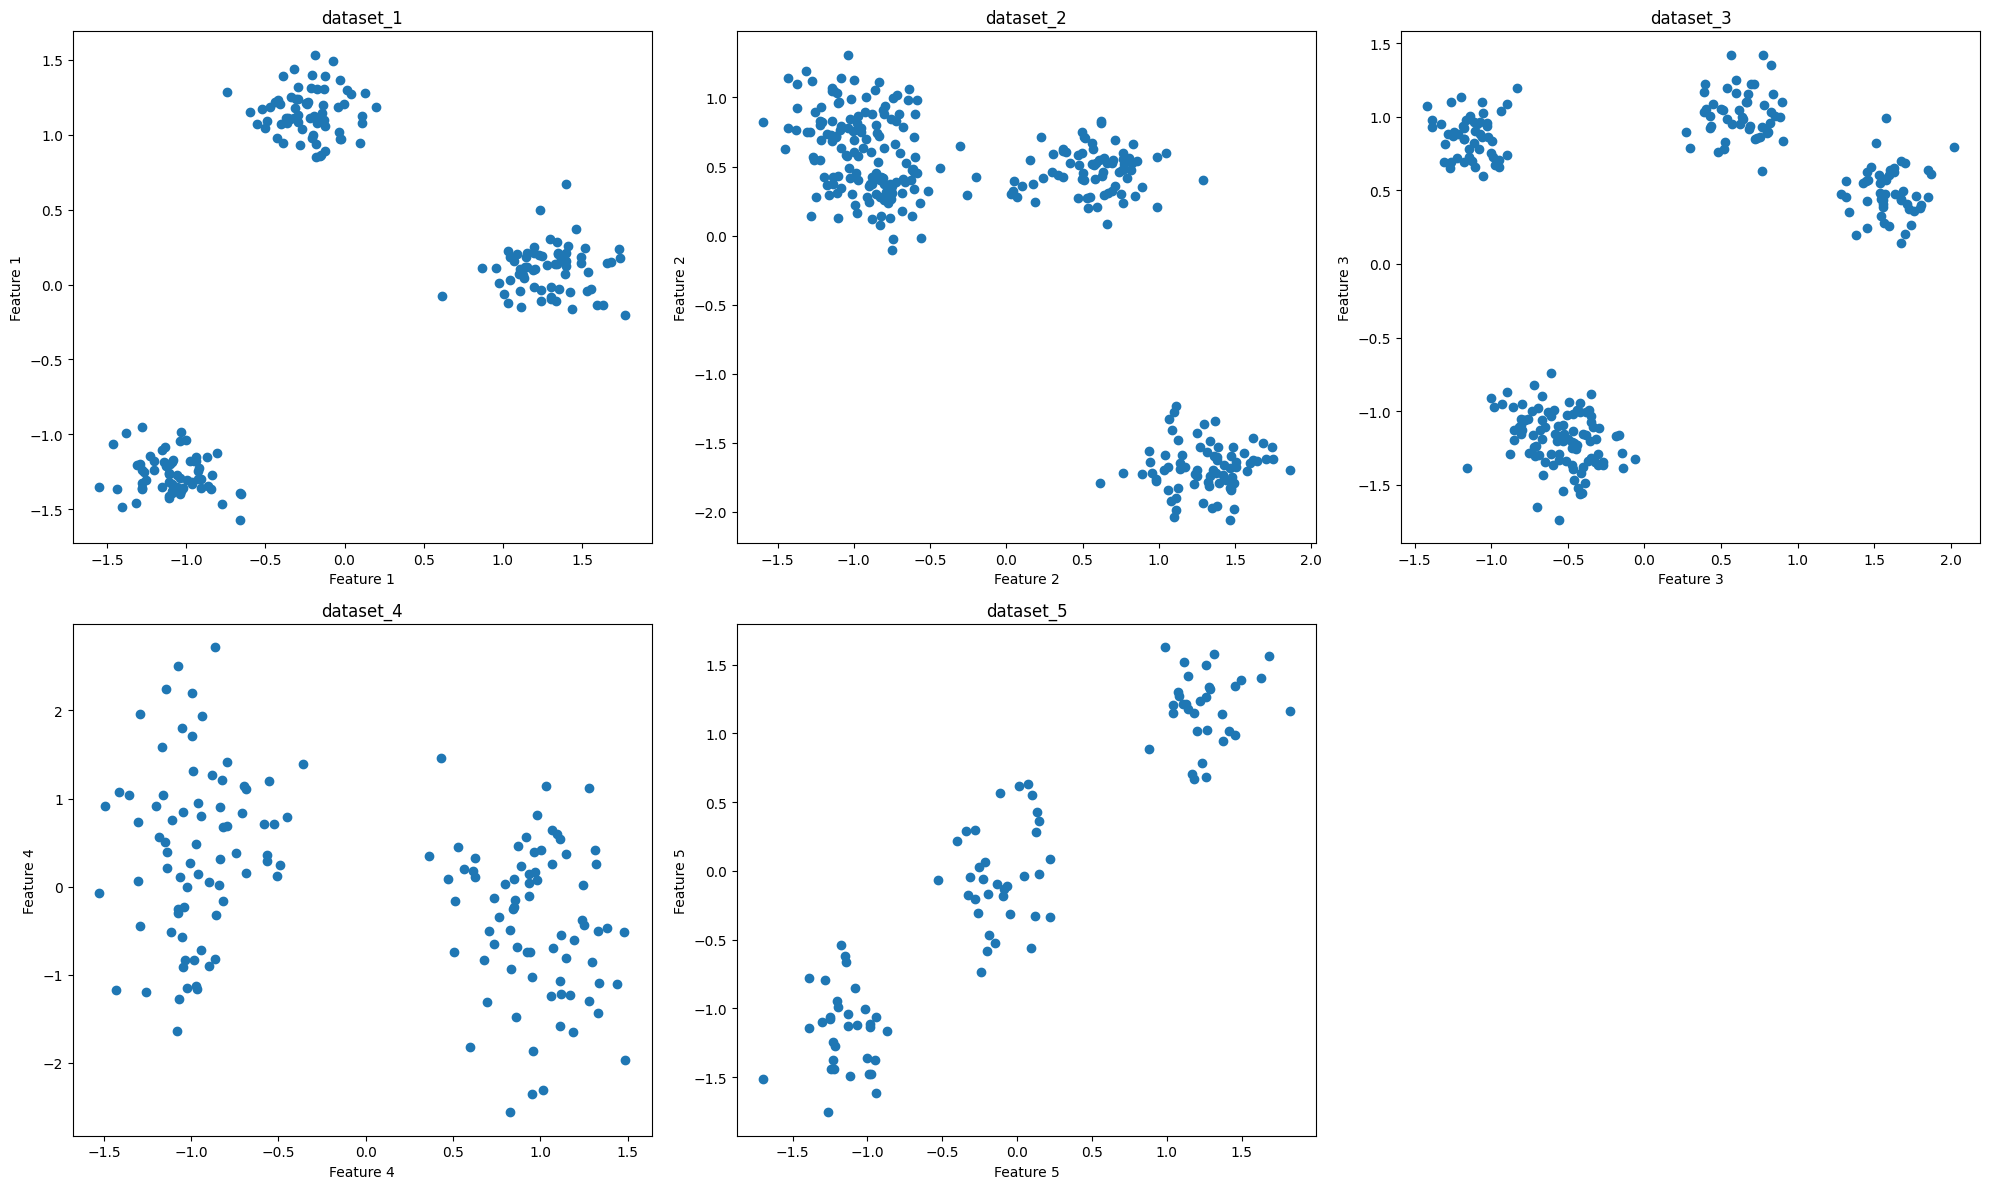

In [7]:
plt.figure(figsize=(20, 12))
for i, (name, data) in enumerate(datasets.items(), 1):
    plt.subplot(2, 3, i)
    plt.scatter(data[:,0], data[:,1])
    plt.title(name)
    plt.xlabel(f'Feature {i}')
    plt.ylabel(f'Feature {i}')
plt.tight_layout()
plt.show()

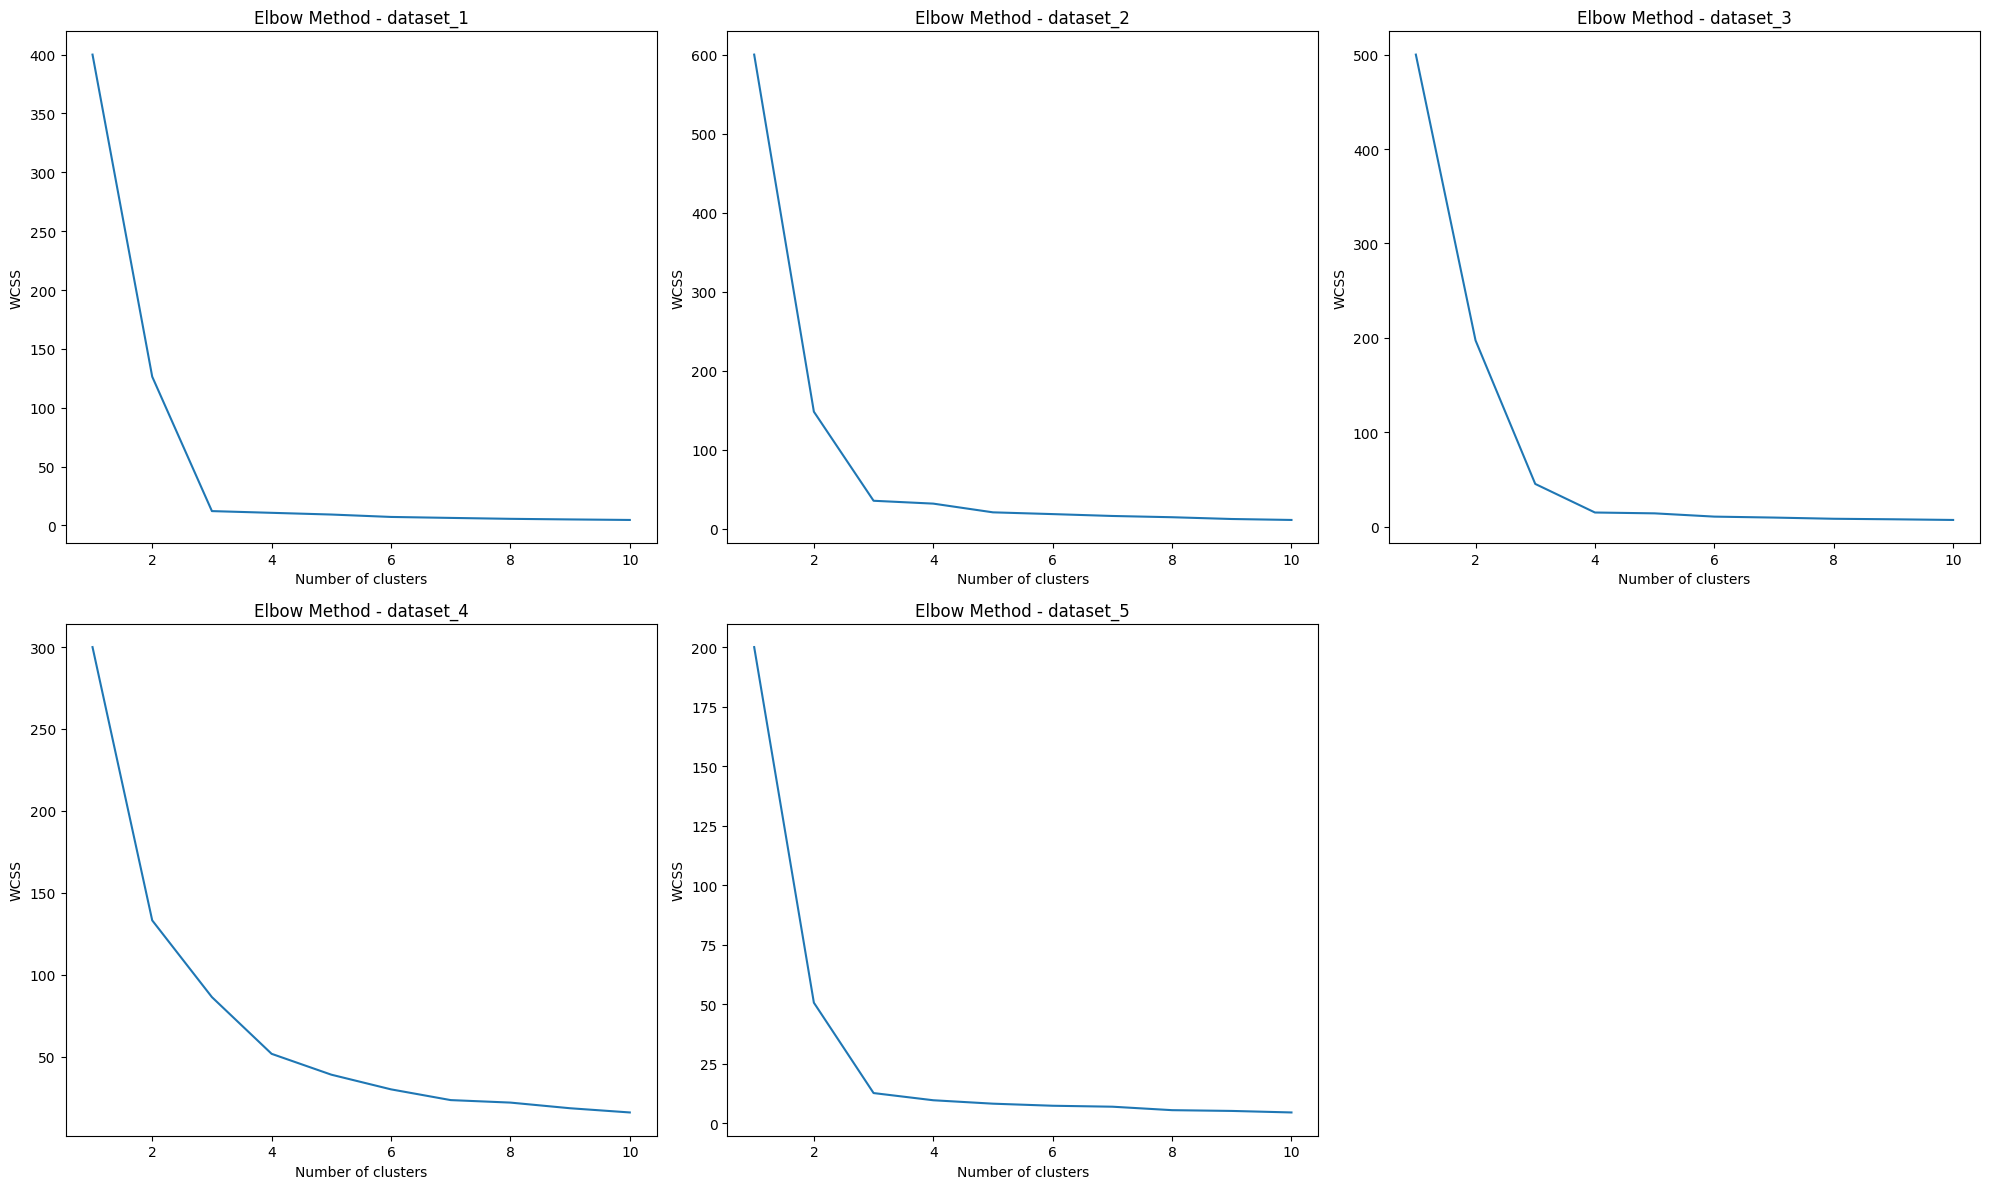

In [8]:
plt.figure(figsize=(20, 12))
for i, (name, data) in enumerate(datasets.items(), 1):
    plt.subplot(2, 3, i)
    wcss = []
    for k in range(1, 11):
       kmeans = KMeans(n_clusters=k, random_state=42)
       kmeans.fit(data)
       wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.title("Elbow Method - " + name)
plt.tight_layout()
plt.show()

## Cluster Visualization

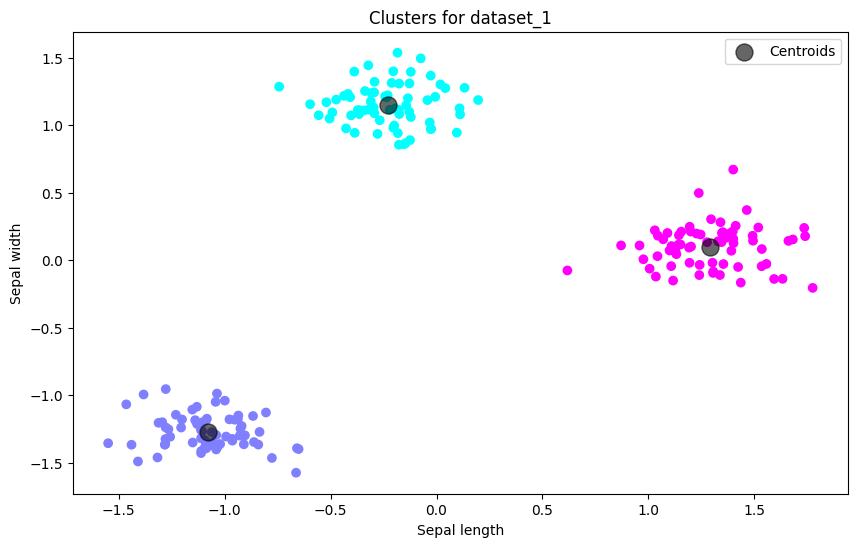

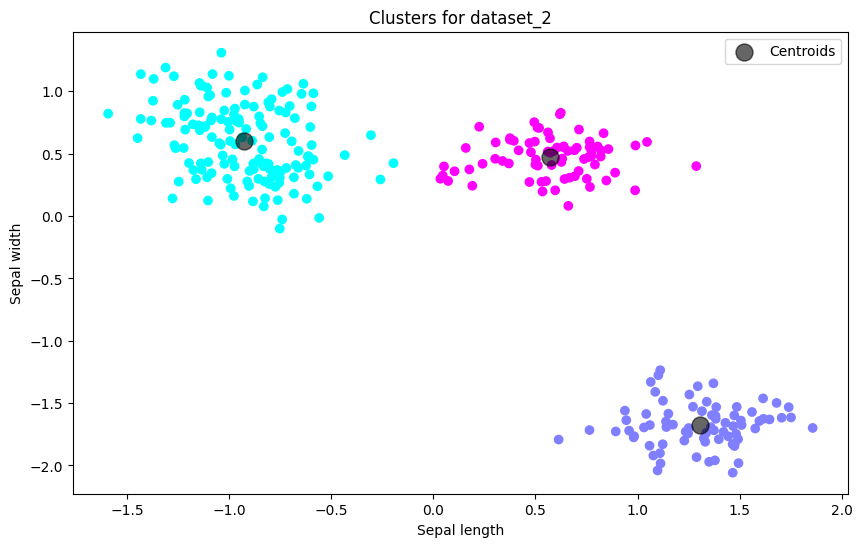

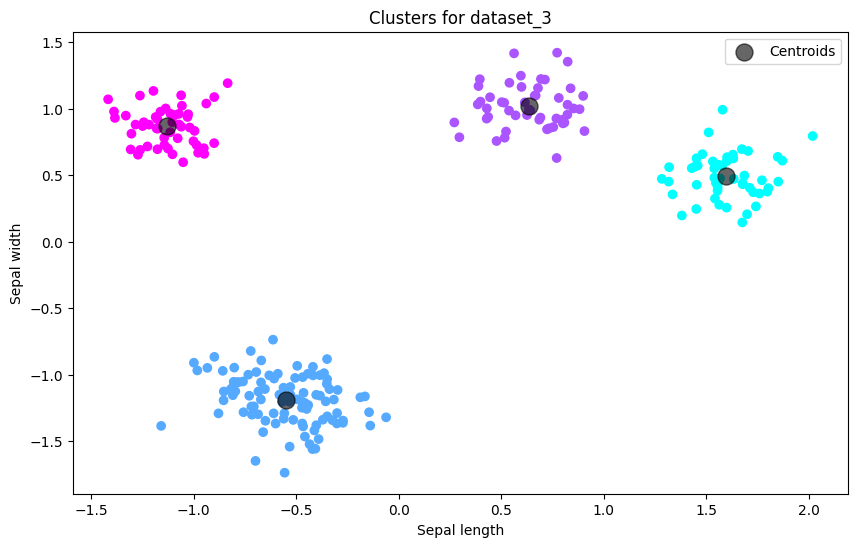

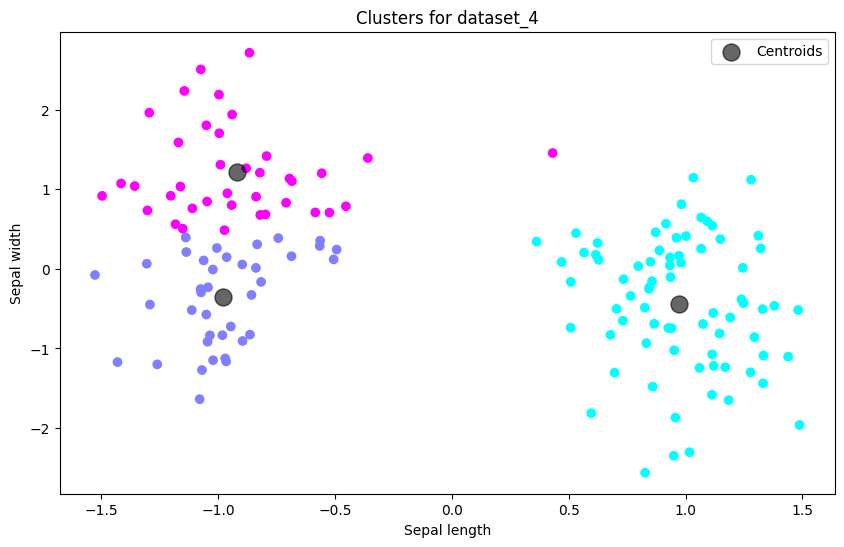

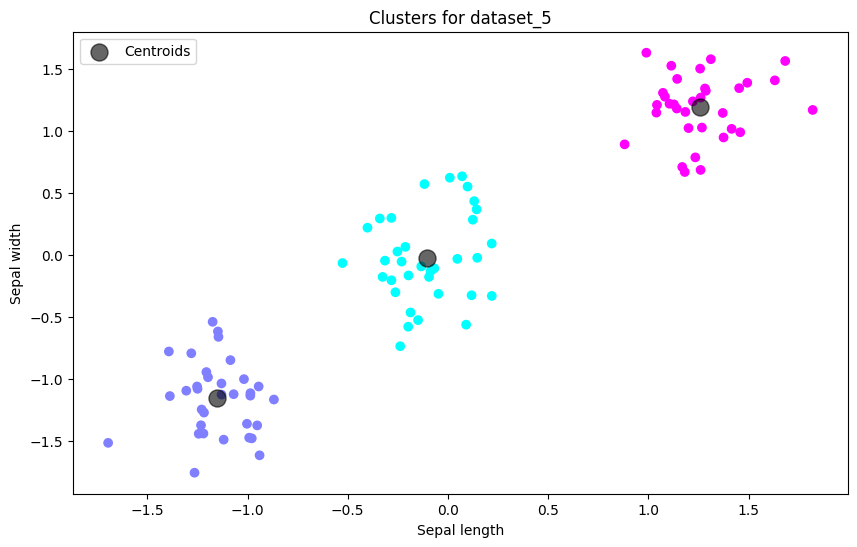

In [9]:
for i, (name, data) in enumerate(datasets.items(), 1):

    if name[-1]=='3':
            # Applying K-Means Clustering
            kmeans = KMeans(n_clusters=4, random_state=42)
            y_kmeans = kmeans.fit_predict(data)
            centroids = kmeans.cluster_centers_
    
            plt.figure(figsize=(10, 6))
            plt.scatter(data[:, 0], data[:, 1], c=y_kmeans,  cmap='cool')
            plt.scatter(centroids[:, 0], centroids[:, 1], s=150, c='black', alpha=0.6, label='Centroids')
            plt.xlabel('Sepal length')
            plt.ylabel('Sepal width')
            plt.title(f"Clusters for {name}")
            plt.legend()
            plt.show()


    else:
        # Applying K-Means Clustering
        kmeans = KMeans(n_clusters=3, random_state=42)
        y_kmeans = kmeans.fit_predict(data)
        centroids = kmeans.cluster_centers_
    
        plt.figure(figsize=(10, 6))
        plt.scatter(data[:, 0], data[:, 1], c=y_kmeans,  cmap='cool')
        plt.scatter(centroids[:, 0], centroids[:, 1], s=150, c='black', alpha=0.6, label='Centroids')
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.title(f"Clusters for {name}")
        plt.legend()
        plt.show()
        

## Evaluation and Discussion

In [10]:
for name in datasets.keys():
    print(f"Dataset {name[-1]}:")
    if name == 'dataset_1':
        print("K-Means likely performed very well. The data is well-separated into distinct clusters.")
    elif name == 'dataset_2':
        print("K-Means may have faced challenges due to overlapping clusters. Clusters are less well-defined.")
    elif name == 'dataset_3':
        print("K-Means likely performed reasonably well. Clusters are well-separated, aiding in accurate clustering.")
    elif name == 'dataset_4':
        print("K-Means may have struggled due to non-spherical clusters. The elongated shape can lead to suboptimal clustering.")
    elif name == 'dataset_5':
        print("K-Means probably performed well. The clusters are spherical and well-separated, aligning with K-Means assumptions.")

Dataset 1:
K-Means likely performed very well. The data is well-separated into distinct clusters.
Dataset 2:
K-Means may have faced challenges due to overlapping clusters. Clusters are less well-defined.
Dataset 3:
K-Means likely performed reasonably well. Clusters are well-separated, aiding in accurate clustering.
Dataset 4:
K-Means may have struggled due to non-spherical clusters. The elongated shape can lead to suboptimal clustering.
Dataset 5:
K-Means probably performed well. The clusters are spherical and well-separated, aligning with K-Means assumptions.


In [11]:
for name in datasets.keys():
    print(f"Challenges faced during clustering for {name}:")
    if name == 'dataset_1':
        print("- Determining the number of clusters wasn't a significant challenge due to well-separated clusters.")
        print("- Dealing with different densities or shapes was not a major concern.")
    elif name == 'dataset_2':
        print("- Determining the number of clusters might have been challenging due to overlapping clusters.")
        print("- Dealing with different densities or shapes was important as clusters are less well-defined.")
    elif name == 'dataset_3':
        print("- Determining the number of clusters was relatively straightforward due to well-separated clusters.")
        print("- Dealing with different densities or shapes might still be a consideration.")
    elif name == 'dataset_4':
        print("- Determining the number of clusters could have been challenging due to elongated clusters.")
        print("- Dealing with different densities or shapes was crucial as clusters are non-spherical.")
    elif name == 'dataset_5':
        print("- Determining the number of clusters wasn't a significant challenge due to well-separated clusters.")
        print("- Dealing with different densities or shapes was not a major concern as clusters are spherical.")

Challenges faced during clustering for dataset_1:
- Determining the number of clusters wasn't a significant challenge due to well-separated clusters.
- Dealing with different densities or shapes was not a major concern.
Challenges faced during clustering for dataset_2:
- Determining the number of clusters might have been challenging due to overlapping clusters.
- Dealing with different densities or shapes was important as clusters are less well-defined.
Challenges faced during clustering for dataset_3:
- Determining the number of clusters was relatively straightforward due to well-separated clusters.
- Dealing with different densities or shapes might still be a consideration.
Challenges faced during clustering for dataset_4:
- Determining the number of clusters could have been challenging due to elongated clusters.
- Dealing with different densities or shapes was crucial as clusters are non-spherical.
Challenges faced during clustering for dataset_5:
- Determining the number of cluster

In [12]:
print('Discuss why K-Means was suitable for datasets where it performed well')
for name in datasets.keys():
    print(f"For {name}:")
    if name in ['Dataset 1', 'Dataset 3', 'Dataset 5']:
        print("- K-Means was suitable because the clusters were well-separated and spherical.")
        print("- K-Means assumes clusters of similar sizes and densities, which aligned with the data distribution.")
    else:
        print("- K-Means struggled due to challenges such as overlapping clusters, non-spherical shapes, or varying densities.")

print('\n\nDiscuss possible reasons for K-Means struggles and suggest alternative techniques')
for name in datasets.keys():
    print(f"For {name}:")
    if name == 'Dataset 2':
        print("- K-Means struggled due to overlapping clusters. DBSCAN, which can identify density-connected regions, might be more appropriate.")
    elif name == 'Dataset 4':
        print("- K-Means struggled due to non-spherical clusters. Gaussian Mixture Models (GMM) can model more complex shapes and may be better suited.")
    else:
        print("- K-Means struggled due to the data's complex structure. Hierarchical clustering, which does not require the pre-specification of the number of clusters, might be more suitable.")

Discuss why K-Means was suitable for datasets where it performed well
For dataset_1:
- K-Means struggled due to challenges such as overlapping clusters, non-spherical shapes, or varying densities.
For dataset_2:
- K-Means struggled due to challenges such as overlapping clusters, non-spherical shapes, or varying densities.
For dataset_3:
- K-Means struggled due to challenges such as overlapping clusters, non-spherical shapes, or varying densities.
For dataset_4:
- K-Means struggled due to challenges such as overlapping clusters, non-spherical shapes, or varying densities.
For dataset_5:
- K-Means struggled due to challenges such as overlapping clusters, non-spherical shapes, or varying densities.


Discuss possible reasons for K-Means struggles and suggest alternative techniques
For dataset_1:
- K-Means struggled due to the data's complex structure. Hierarchical clustering, which does not require the pre-specification of the number of clusters, might be more suitable.
For dataset_2:
- K